In [1]:
#%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import json
import seaborn
from scipy.stats import ttest_ind

yelp_df = pd.read_csv('Resources/yelp_data_clean.csv')
yelp_df.head()


,Unnamed: 0,Unnamed: 0.1,name,categories,address,city,postalCode,state,country,latitude,longitude,count,Rating,Review Count,Closed
0,0,0,Carl's Jr.,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",2555 11th Avenue,Greeley,80631,Colorado,US,40.39629,-104.69699,205,2.5,6.0,False
1,1,1,Del Taco,"Restaurant,Mexican Restaurants,Fast Food Resta...",2513 Highway 6 And 50,Grand Junction,81505,Colorado,US,39.08135,-108.58689,30,3.5,6.0,False
2,2,2,Chipotle Mexican Grill,"Fast Food Restaurants,Mexican Restaurants,Rest...",3455 N Salida Court,Aurora,80011,Colorado,US,39.76369,-104.77671,142,3.0,43.0,False
3,3,3,Taco Bell,"Fast Food Restaurants,Mexican Restaurants,Rest...",5225 E Colfax Avenue,Denver,80220,Colorado,US,39.74044,-104.92636,529,2.0,40.0,False
4,4,4,McDonald's,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",1350 W Colfax Avenue,Denver,80204,Colorado,US,39.73967,-105.00467,784,2.0,56.0,False


In [3]:
#Collecting top five restaurants by amount of restaurants in the sample
yelp_df['name'].value_counts()

Subway                    1089
McDonald's                 774
Taco Bell                  517
Burger King                438
Pizza Hut                  426
                          ... 
Little Caesars Pizza        11
Skyline Chili               11
Jason's Deli                10
Charley's Grilled Subs      10
Blimpie                      4
Name: name, Length: 73, dtype: int64

In [4]:
subway_df = yelp_df[yelp_df['name'] == 'Subway']
subway_df.head()

,Unnamed: 0,Unnamed: 0.1,name,categories,address,city,postalCode,state,country,latitude,longitude,count,Rating,Review Count,Closed
23,24,24,Subway,"Delis And Delicatessens,Restaurant,Carry-out f...",302 W Bypass,Andalusia,36420,Alabama,US,31.30987,-86.49962,1219,3.5,2.0,False
25,26,26,Subway,"Delis And Delicatessens,Restaurant,Carry-out f...",9433 Highway 431 S,Owens Cross Roads,35763,Alabama,US,34.57064,-86.44759,1219,5.0,1.0,False
29,31,31,Subway,"Delis And Delicatessens,Carry-out food,Delicat...",6707 Highway 431 S Ste 104,Owens Cross Roads,35763,Alabama,US,34.65901,-86.48167,1219,3.0,3.0,False
35,38,38,Subway,"Delis And Delicatessens,Carry-out food,Delicat...",720 Main St NE,Hanceville,35077,Alabama,US,34.07124,-86.77643,1219,5.0,1.0,False
59,62,62,Subway,"Delis And Delicatessens,Take Out Restaurants,F...",1003 Highway 231 S,Troy,36081,Alabama,US,31.78473,-85.96336,1219,3.5,3.0,False


In [5]:
mcdonalds_df = yelp_df[yelp_df['name'] == "McDonald's"]

In [6]:
tacobell_df = yelp_df[yelp_df['name'] == 'Taco Bell']

In [7]:
burgerking_df = yelp_df[yelp_df['name'] == 'Burger King']

In [8]:
pizzahut_df = yelp_df[yelp_df['name'] == 'Pizza Hut']

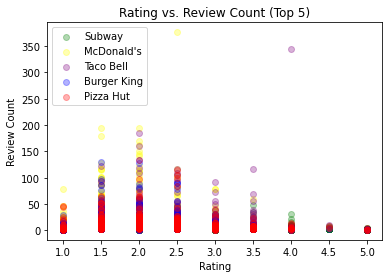

In [28]:
plt.scatter(subway_df['Rating'], subway_df['Review Count'], color='green', alpha = 0.3, label = "Subway")
plt.scatter(mcdonalds_df['Rating'], mcdonalds_df['Review Count'], color = 'yellow', alpha = 0.3, label = "McDonald's")
plt.scatter(tacobell_df['Rating'], tacobell_df['Review Count'], color = 'purple',alpha = 0.3, label = 'Taco Bell')
plt.scatter(burgerking_df['Rating'], burgerking_df['Review Count'], color = 'blue', alpha = 0.3, label = 'Burger King')
plt.scatter(pizzahut_df['Rating'], pizzahut_df['Review Count'], color = 'red', alpha = 0.3, label = 'Pizza Hut')
plt.legend()
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.title('Rating vs. Review Count (Top 5)')
plt.show()


Text(0.5, 1.0, 'Ratings vs. Review Count (All Restaurants)')

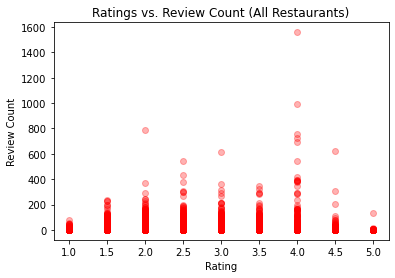

In [29]:
plt.scatter(yelp_df['Rating'], yelp_df['Review Count'], color = 'red', alpha = 0.3)
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.title('Ratings vs. Review Count (All Restaurants)')